In [5]:
#Imports and set up
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
print("Libraries imported successfully")

Libraries imported successfully


In [6]:
#Following cell is for data loading and cleaning

#Load the dataset from the CSV file
df = pd.read_csv('diabetic_data.csv')
print("Dataset successfully loaded")

df.head()

#Replace all the mostly missing value cells with missing value markers and drop them
df.replace('?', pd.NA, inplace=True)
df.drop(['weight', 'payer_code', 'medical_specialty'], axis=1, inplace=True)
print(df.isnull().sum())

# Map the binary target variable, and replace <30 and >30 to showing 1 is yes (readmitted in 30 days), 
# 0 is no (not readmitted in 30 days) respectively
df['readmitted'] = df['readmitted'].replace({'<30': 1, '>30': 0, 'NO': 0})
df['readmitted'].value_counts()

Dataset successfully loaded
encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide           

/var/folders/g5/qbm9xyfx6wvcfg2cg77frnbm0000gr/T/ipykernel_52195/3720147131.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['readmitted'] = df['readmitted'].replace({'<30': 1, '>30': 0, 'NO': 0})


readmitted
0    90409
1    11357
Name: count, dtype: int64

In [7]:
#Convert categorical data into numbers (One-hot encoding)
categorical_cols = ['race', 'gender', 'age']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df.head()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,gender_Unknown/Invalid,age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100)
0,2278392,8222157,6,25,1,1,41,0,1,0,...,False,False,False,False,False,False,False,False,False,False
1,149190,55629189,1,1,7,3,59,0,18,0,...,False,True,False,False,False,False,False,False,False,False
2,64410,86047875,1,1,7,2,11,5,13,2,...,False,False,True,False,False,False,False,False,False,False
3,500364,82442376,1,1,7,2,44,1,16,0,...,False,False,False,True,False,False,False,False,False,False
4,16680,42519267,1,1,7,1,51,0,8,0,...,False,False,False,False,True,False,False,False,False,False


In [8]:
#Selecting features (X) and target (y)

#Make the readmitted column as the target 'y', then select all other ones as 'X' and drop the remaining text columns to keep it simple
y = df['readmitted']
X_numeric = df.select_dtypes(include='number')
X = X_numeric.drop(columns=['encounter_id', 'patient_nbr', 'readmitted'])
print("Features and target selected")

Features and target selected


In [9]:
#Splitting data for training vs testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Data successfully split into training and testing sets")

Data successfully split into training and testing sets


In [10]:
#Handling missing values
from sklearn.impute import SimpleImputer

#Create imputer object and fill them in with the median value of each column
imputer = SimpleImputer(strategy='median')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

print("Missing values handled")

Missing values handled


In [11]:
#Training the model, use the RandomForestClassifier model to make a accurate prediction
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42, class_weight='balanced')

#Train model
model.fit(X_train, y_train)
print("Model training complete using RandomForest complete!")

Model training complete using RandomForest complete!


In [12]:
#Making predictions
predictions = model.predict(X_test)
print("Predictions made based on the test data set.")

Predictions made based on the test data set.


Accuracy: 0.88
------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     18083
           1       0.25      0.02      0.04      2271

    accuracy                           0.88     20354
   macro avg       0.57      0.51      0.49     20354
weighted avg       0.82      0.88      0.84     20354

Confusion Matrix:


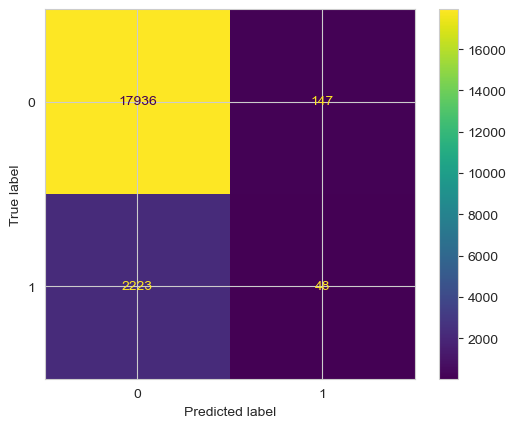

In [13]:
#Checking performance of prediction
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

#Calculate and display the classification report, and a confusion matrix
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")
print("-" * 30)

print("Classification Report:")
print(classification_report(y_test, predictions))
print("Confusion Matrix:")
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)